<a href="https://colab.research.google.com/github/MiniomTarolero/Hola-Mundo/blob/main/Retailers_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
# Cargar archivo csv desde equipo
from google.colab import files
files.upload()

Saving Reto_Microretailer.csv to Reto_Microretailer (1).csv


{'Reto_Microretailer.csv': b',_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,97_number_of_customers_in_store,268_number_fridges,184_store_devices,104_how_many_shelves_does_the_micro_retailer_have,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,233_date_establishment,2_current_permanent_employees,4_number_permanent_employees_last_year,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,155_sales_registers_used_for,103_number_own_fridges,19_tax_id,145_number_direct_competitors,310_burnout,24_burnout,186_internet_connection,210_sales_channels,189_payment_methods,28_prefered_p

In [22]:
# Cargar archivo .xlsx desde equipo
MRetailer=pd.read_csv('Reto_Microretailer.csv')
MRetailer

,Unnamed: 0,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,...,275_platform_days_receive_money.1,276_expected_days_informal_credit.1,36_credit_default_rate.1,315_frequency_topups.1,316_frequency_utility_bills.1,317_home_deliveries.1,62_frequency_only_services.1,78_number_home_deliveries_week.1,172_supplier_frequency.1,163_number_high_perishable_products.1
0,0,1061182c-8233-4144-88db-f9feb31238ae,"November 27, 2022",2022-11-27 18:30:37 UTC,Sandra Carreón,SRID=4326;POINT(-98.1977276132 19.0493900908),19.049390,-98.197728,MINI SUPER 3 NORTE,1 Photo,...,1.0,7.0,5.0,1.0,1.0,5.0,1.0,3.0,4.0,2.0
1,1,9b2bbb5d-661b-4c0b-9258-6131338f03be,"November 27, 2022",2022-11-27 18:04:02 UTC,Sandra Carreón,SRID=4326;POINT(-98.1936556846 19.0449551147),19.044955,-98.193656,Miscelánea,1 Photo,...,1.0,7.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,2.0
2,2,2b46a363-39db-4346-96c3-58ffd2036b68,"November 27, 2022",2022-11-27 18:04:01 UTC,Sandra Carreón,SRID=4326;POINT(-98.1967942044 19.049513054),19.049513,-98.196794,Miscelánea casa cruz,1 Photo,...,1.0,7.0,5.0,1.0,1.0,5.0,1.0,3.0,3.0,3.0
3,3,676ba17b-a91d-4dc3-b929-def51bbbc224,"November 27, 2022",2022-11-27 18:04:01 UTC,Sandra Carreón,SRID=4326;POINT(-98.1956328079 19.0478929748),19.047893,-98.195633,SUPER & ALMACENES,1 Photo,...,1.0,7.0,5.0,1.0,1.0,5.0,1.0,3.0,2.0,0.0
4,4,60c8c605-27e7-4d79-bac2-595e071a0d1c,"November 27, 2022",2022-11-27 18:04:00 UTC,Sandra Carreón,SRID=4326;POINT(-98.20214957 19.0451157951),19.045116,-98.202150,Ranita “V”,1 Photo,...,1.0,7.0,5.0,1.0,1.0,5.0,1.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,439,efe2e285-c67e-4a07-8331-218bc4a7203d,"November 3, 2022",2022-11-03 17:05:23 UTC,Francisco Adán,SRID=4326;POINT(-98.194174 19.0431876),19.043188,-98.194174,Xuti Galería,1 Photo,...,7.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
440,440,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,July Store,1 Photo,...,7.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
441,441,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,La fonda,1 Photo,...,7.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
442,442,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,...,7.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0


In [23]:
# Identificar valores nulos por columna
valores_nulos=MRetailer.isnull().sum()
valores_nulos

Unnamed: 0                               0
_record_id                               0
_title                                   0
_server_updated_at                       0
_updated_by                              0
                                        ..
317_home_deliveries.1                    0
62_frequency_only_services.1             0
78_number_home_deliveries_week.1         0
172_supplier_frequency.1                 0
163_number_high_perishable_products.1    0
Length: 129, dtype: int64

In [24]:
# Identificar valores nulos por columna
valores_nulos=MRetailer.isnull().sum().sum()
valores_nulos

0

In [25]:
#Identificamos tipos de variables 
MRetailer.info(128)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 129 columns):
 #    Column                                                      Dtype  
---   ------                                                      -----  
 0    Unnamed: 0                                                  int64  
 1    _record_id                                                  object 
 2    _title                                                      object 
 3    _server_updated_at                                          object 
 4    _updated_by                                                 object 
 5    _geometry                                                   object 
 6    _latitude                                                   float64
 7    _longitude                                                  float64
 8    228_store_name                                              object 
 9    229_store_picture                                           object 
 10   

Para los modelos de refresión se eligión dos variables independientes que se considera que son las variables que no controla el negocio que son el número de clientes que estaban en el negocio y el numero de competidores directos que tiene el negocio.
Como variables dependientes se ecogieron los factores que el negocio tiene control sobre ellos pero que la decicisión que tome el negocio sobre estos factores que son, el numero de empleados actuales, el número de empleados permanenete, las veces que el dueño o empleado se sintió  cansado en la semana, el número de refrigeradores y el número de estántes. 

# Modelo de regresión 1

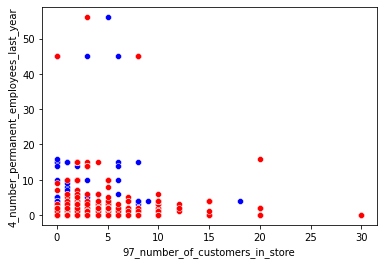

In [46]:
#Se grafican mapas de dispersión de las variables 2 variables
from turtle import color

sns.scatterplot(x='97_number_of_customers_in_store', y='4_number_permanent_employees_last_year', color="blue", data=MRetailer)
sns.scatterplot(x='145_number_direct_competitors', y='4_number_permanent_employees_last_year', color="red", data=MRetailer)


**Variable independientes**


*   Número de competidores directos 
*   Número de clientes en el negocio

**Variable dependiente**


*   Número empleados permanenetes el ultimo año



In [31]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= MRetailer[['97_number_of_customers_in_store', '145_number_direct_competitors']]
Var_Dep= MRetailer['4_number_permanent_employees_last_year']

In [32]:
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [33]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [34]:
#Se escalan todos los datos
escalar = StandardScaler()

In [35]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [36]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [37]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

In [42]:
#Calculo la precisión del modelo#####checar o ver una variable con si / no
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='micro',pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.291044776119403


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [43]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.291044776119403


In [45]:
#Calculo la sensibilidad del modelo ####
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="micro", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.291044776119403


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


# Modelo de regresión 2

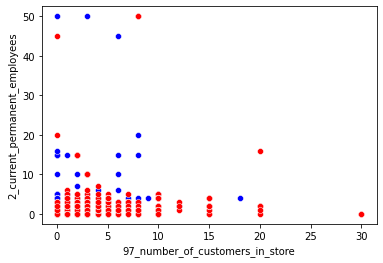

In [47]:
#Se grafican mapas de dispersión de las variables 2variables
from turtle import color

sns.scatterplot(x='97_number_of_customers_in_store', y='2_current_permanent_employees', color="blue", data=MRetailer)
sns.scatterplot(x='145_number_direct_competitors', y='2_current_permanent_employees', color="red", data=MRetailer)

**Variable independientes**


*   Número de competidores directos 
*   Número de clientes en el negocio

**Variable dependiente**


*   Número de clientes en la tienda



In [48]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= MRetailer[['97_number_of_customers_in_store', '145_number_direct_competitors']]
Var_Dep= MRetailer['2_current_permanent_employees']

In [49]:
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [50]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [51]:
#Se escalan todos los datos
escalar = StandardScaler()

In [52]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [53]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [54]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [55]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred


array([ 1.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  1.,  2.,  2.,  1.,  2.,
        2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  0.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,
        2.,  2.,  2.,  2.,  2.,  4.,  2.,  2.,  2.,  1.,  2.,  2.,  0.,
        2.,  2.,  2.,  2.,  1.,  2.,  1.,  2.,  2.,  1.,  2.,  2.,  2.,
        2.,  0.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,  2.,  0.,  1.,  2.,
        2.,  2.,  2.,  0.,  2.,  2.,  2.,  2.,  2., 16.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  1.,  0.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,
        2.,  2.,  1.,  0.,  2.,  2.,  2.,  0.,  0.,  2.,  2.,  0.,  1.,
        2.,  2.,  2.,  3.])

In [56]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 0  4 17  0  0  0  0  0  0  1  0]
 [ 2  8 26  0  0  0  0  0  0  0  0]
 [ 6  4 35  0  0  0  0  0  0  0  0]
 [ 1  1 15  0  0  0  0  0  0  0  0]
 [ 1  0  3  0  1  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0]]


In [57]:
#Calculo la precisión del modelo#####checar o ver una variable con si / no
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='micro',pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.3283582089552239


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [58]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.3283582089552239


In [59]:
#Calculo la sensibilidad del modelo ####
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="micro", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.3283582089552239


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


# Modelo de regresión 3

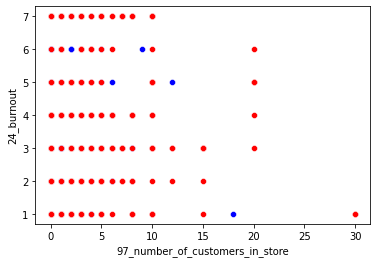

In [60]:
#Se grafican mapas de dispersión de las variables 2variables
from turtle import color

sns.scatterplot(x='97_number_of_customers_in_store', y='24_burnout', color="blue", data=MRetailer)
sns.scatterplot(x='145_number_direct_competitors', y='24_burnout', color="red", data=MRetailer)

**Variable independientes**


*   Número de competidores directos 
*   Número de clientes en el negocio

**Variable dependiente**


*   Número de veces que el empleado o dueño se sintió cansado en la semana



In [61]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= MRetailer[['97_number_of_customers_in_store', '145_number_direct_competitors']]
Var_Dep= MRetailer['24_burnout']

In [62]:
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [63]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [64]:
#Se escalan todos los datos
escalar = StandardScaler()

In [65]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [66]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [67]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [68]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array([3., 3., 4., 3., 4., 3., 3., 3., 7., 3., 3., 3., 3., 4., 3., 3., 3.,
       3., 3., 4., 3., 4., 4., 3., 4., 3., 4., 3., 3., 4., 3., 3., 3., 3.,
       3., 3., 4., 4., 4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4.,
       3., 4., 7., 4., 3., 4., 3., 4., 3., 4., 4., 3., 4., 4., 4., 4., 4.,
       4., 4., 3., 3., 4., 4., 3., 3., 3., 7., 4., 4., 3., 4., 4., 3., 3.,
       4., 4., 5., 7., 7., 3., 4., 3., 4., 4., 3., 4., 3., 4., 3., 3., 4.,
       3., 3., 7., 3., 3., 4., 3., 3., 4., 4., 4., 3., 4., 3., 4., 4., 3.,
       3., 4., 3., 3., 4., 3., 4., 4., 3., 3., 3., 3., 3., 3., 4.])

In [69]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 0  0  9  4  1  0  0]
 [ 0  0 12  5  0  0  2]
 [ 0  0 17 15  0  0  1]
 [ 0  0 10 15  0  0  1]
 [ 0  0 11  3  0  0  1]
 [ 0  0  3  3  0  0  0]
 [ 0  0 12  8  0  0  1]]


In [70]:
#Calculo la precisión del modelo#####checar o ver una variable con si / no
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='micro',pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.2462686567164179


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [71]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.2462686567164179


In [72]:
#Calculo la sensibilidad del modelo ####
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="micro", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.2462686567164179


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


# Modelo de regresión 4

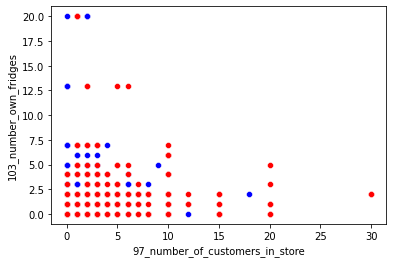

In [73]:
#Se grafican mapas de dispersión de las variables 2 variables
from turtle import color

sns.scatterplot(x='97_number_of_customers_in_store', y='103_number_own_fridges', color="blue", data=MRetailer)
sns.scatterplot(x='145_number_direct_competitors', y='103_number_own_fridges', color="red", data=MRetailer)


**Variable independientes**


*   Número de competidores directos 
*   Número de clientes en el negocio

**Variable dependiente**


*   Número de veces refrigeradores en la tienda



In [74]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= MRetailer[['97_number_of_customers_in_store', '145_number_direct_competitors']]
Var_Dep= MRetailer['103_number_own_fridges']

In [75]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [76]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [77]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [78]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['97_number_of_customers_in_store', '145_number_direct_competitors'],
       dtype=object),
 'n_features_in_': 2,
 'coef_': array([ 0.00902822, -0.05804372]),
 '_residues': 3051.6966989362973,
 'rank_': 2,
 'singular_': array([86.59424026, 41.51677381]),
 'intercept_': 2.2213186585781743}

In [79]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(Vars_Indep,Var_Dep)

0.008205218317494989

In [82]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=MRetailer[['97_number_of_customers_in_store', '145_number_direct_competitors']])
y_pred

array([2.01622841, 2.00720019, 1.90014096, 2.13231586, 1.87305632,
       2.01622841, 2.00720019, 2.17230315, 1.98914376, 2.00720019,
       1.99817198, 1.93110004, 1.93110004, 1.99817198, 2.22131866,
       2.12328764, 1.75696887, 1.78405351, 2.25743152, 1.94012825,
       1.81501259, 1.83306902, 1.94012825, 2.00720019, 1.88208453,
       1.93110004, 1.88208453, 2.0562157 , 2.1594005 , 2.17745693,
       2.10523121, 2.11425943, 2.10523121, 2.10523121, 2.04718749,
       1.76599708, 1.76599708, 1.75696887, 1.75696887, 1.75696887,
       1.7750253 , 2.10523121, 2.04718749, 1.98914376, 2.10523121,
       1.3506628 , 1.95818468, 1.94915647, 1.94012825, 1.94915647,
       1.65893785, 2.06524392, 1.99817198, 1.36871923, 1.66796606,
       2.08330035, 2.07427213, 2.07427213, 2.21744422, 1.07850061,
       2.13231586, 1.88208453, 2.04718749, 2.0562157 , 2.04718749,
       2.09232856, 1.10558526, 1.64088142, 2.10523121, 2.23034687,
       2.23034687, 2.29354438, 2.0562157 , 1.88208453, 1.99817

In [83]:
#Insertamos la columna de predicciones en el DataFrame
MRetailer.insert(0, 'Predicciones', y_pred)
MRetailer

,Predicciones,Unnamed: 0,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,...,275_platform_days_receive_money.1,276_expected_days_informal_credit.1,36_credit_default_rate.1,315_frequency_topups.1,316_frequency_utility_bills.1,317_home_deliveries.1,62_frequency_only_services.1,78_number_home_deliveries_week.1,172_supplier_frequency.1,163_number_high_perishable_products.1
0,2.016228,0,1061182c-8233-4144-88db-f9feb31238ae,"November 27, 2022",2022-11-27 18:30:37 UTC,Sandra Carreón,SRID=4326;POINT(-98.1977276132 19.0493900908),19.049390,-98.197728,MINI SUPER 3 NORTE,...,1.0,7.0,5.0,1.0,1.0,5.0,1.0,3.0,4.0,2.0
1,2.007200,1,9b2bbb5d-661b-4c0b-9258-6131338f03be,"November 27, 2022",2022-11-27 18:04:02 UTC,Sandra Carreón,SRID=4326;POINT(-98.1936556846 19.0449551147),19.044955,-98.193656,Miscelánea,...,1.0,7.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,2.0
2,1.900141,2,2b46a363-39db-4346-96c3-58ffd2036b68,"November 27, 2022",2022-11-27 18:04:01 UTC,Sandra Carreón,SRID=4326;POINT(-98.1967942044 19.049513054),19.049513,-98.196794,Miscelánea casa cruz,...,1.0,7.0,5.0,1.0,1.0,5.0,1.0,3.0,3.0,3.0
3,2.132316,3,676ba17b-a91d-4dc3-b929-def51bbbc224,"November 27, 2022",2022-11-27 18:04:01 UTC,Sandra Carreón,SRID=4326;POINT(-98.1956328079 19.0478929748),19.047893,-98.195633,SUPER & ALMACENES,...,1.0,7.0,5.0,1.0,1.0,5.0,1.0,3.0,2.0,0.0
4,1.873056,4,60c8c605-27e7-4d79-bac2-595e071a0d1c,"November 27, 2022",2022-11-27 18:04:00 UTC,Sandra Carreón,SRID=4326;POINT(-98.20214957 19.0451157951),19.045116,-98.202150,Ranita “V”,...,1.0,7.0,5.0,1.0,1.0,5.0,1.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,1.931100,439,efe2e285-c67e-4a07-8331-218bc4a7203d,"November 3, 2022",2022-11-03 17:05:23 UTC,Francisco Adán,SRID=4326;POINT(-98.194174 19.0431876),19.043188,-98.194174,Xuti Galería,...,7.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
440,1.940128,440,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,July Store,...,7.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
441,1.958185,441,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,La fonda,...,7.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
442,1.931100,442,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",...,7.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0


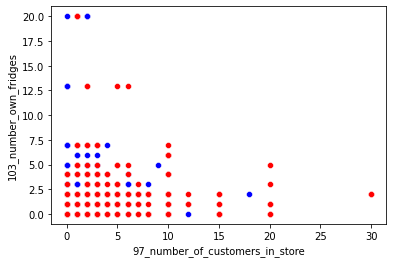

In [85]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='97_number_of_customers_in_store', y='103_number_own_fridges', color="blue", data=MRetailer)
sns.scatterplot(x='145_number_direct_competitors', y='103_number_own_fridges', color="red", data=MRetailer)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [86]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.008205218317494989

In [87]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.09058266013699856

# Modelo de regresión 5


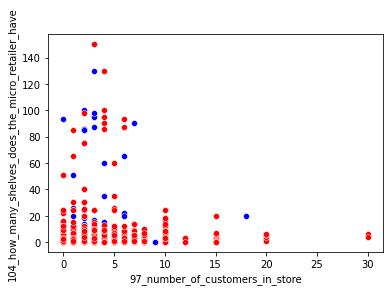

In [88]:
#Se grafican mapas de dispersión de las variables 2 variables
from turtle import color

sns.scatterplot(x='97_number_of_customers_in_store', y='104_how_many_shelves_does_the_micro_retailer_have', color="blue", data=MRetailer)
sns.scatterplot(x='145_number_direct_competitors', y='104_how_many_shelves_does_the_micro_retailer_have', color="red", data=MRetailer)


**Variable independientes**


*   Número de competidores directos 
*   Número de clientes en el negocio

**Variable dependiente**


*   Número de veces estantes en la tienda



In [89]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= MRetailer[['97_number_of_customers_in_store', '145_number_direct_competitors']]
Var_Dep= MRetailer['104_how_many_shelves_does_the_micro_retailer_have']

In [90]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [91]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [92]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [93]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['97_number_of_customers_in_store', '145_number_direct_competitors'],
       dtype=object),
 'n_features_in_': 2,
 'coef_': array([ 1.25764355, -0.17479346]),
 '_residues': 118690.18105079528,
 'rank_': 2,
 'singular_': array([86.59424026, 41.51677381]),
 'intercept_': 6.029347289810595}

In [94]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(Vars_Indep,Var_Dep)

0.02384582956530823

In [100]:
#Predecimos los valores de total de accidentes a partir de las variables
y_pred= model.predict(X=MRetailer[['97_number_of_customers_in_store', '145_number_direct_competitors']])
y_pred

array([ 9.10310409,  7.84546054,  8.75351717,  9.45269102,  4.98058652,
        9.10310409,  7.84546054,  7.11219738,  5.33017344,  7.84546054,
        6.58781699,  5.15537998,  5.15537998,  6.58781699,  6.02934729,
        8.19504747,  4.6309996 ,  8.40393025, 11.05992149,  6.41302353,
        4.80579306,  7.32108016,  6.41302353,  7.84546054,  6.23823007,
        5.15537998,  6.23823007,  6.76261046, 13.22562167, 15.74090876,
        5.67976037,  6.93740392,  5.67976037,  5.67976037,  5.50496691,
        5.88864315,  5.88864315,  4.6309996 ,  4.6309996 ,  4.6309996 ,
        7.1462867 ,  5.67976037,  5.50496691,  5.33017344,  5.67976037,
        3.40744537,  8.92831063,  7.67066708,  6.41302353,  7.67066708,
        6.79669977,  8.020254  ,  6.58781699,  5.92273247,  8.05434332,
       10.5355411 ,  9.27789755,  9.27789755, 13.40041513,  5.04876516,
        9.45269102,  6.23823007,  5.50496691,  6.76261046,  5.50496691,
       11.79318465,  8.82169581,  4.28141268,  5.67976037,  7.28

In [102]:
#Insertamos la columna de predicciones en el DataFrame
MRetailer.insert(0, 'Predicciones1', y_pred)
MRetailer

,Predicciones1,Predicciones,Unnamed: 0,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,...,275_platform_days_receive_money.1,276_expected_days_informal_credit.1,36_credit_default_rate.1,315_frequency_topups.1,316_frequency_utility_bills.1,317_home_deliveries.1,62_frequency_only_services.1,78_number_home_deliveries_week.1,172_supplier_frequency.1,163_number_high_perishable_products.1
0,9.103104,2.016228,0,1061182c-8233-4144-88db-f9feb31238ae,"November 27, 2022",2022-11-27 18:30:37 UTC,Sandra Carreón,SRID=4326;POINT(-98.1977276132 19.0493900908),19.049390,-98.197728,...,1.0,7.0,5.0,1.0,1.0,5.0,1.0,3.0,4.0,2.0
1,7.845461,2.007200,1,9b2bbb5d-661b-4c0b-9258-6131338f03be,"November 27, 2022",2022-11-27 18:04:02 UTC,Sandra Carreón,SRID=4326;POINT(-98.1936556846 19.0449551147),19.044955,-98.193656,...,1.0,7.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,2.0
2,8.753517,1.900141,2,2b46a363-39db-4346-96c3-58ffd2036b68,"November 27, 2022",2022-11-27 18:04:01 UTC,Sandra Carreón,SRID=4326;POINT(-98.1967942044 19.049513054),19.049513,-98.196794,...,1.0,7.0,5.0,1.0,1.0,5.0,1.0,3.0,3.0,3.0
3,9.452691,2.132316,3,676ba17b-a91d-4dc3-b929-def51bbbc224,"November 27, 2022",2022-11-27 18:04:01 UTC,Sandra Carreón,SRID=4326;POINT(-98.1956328079 19.0478929748),19.047893,-98.195633,...,1.0,7.0,5.0,1.0,1.0,5.0,1.0,3.0,2.0,0.0
4,4.980587,1.873056,4,60c8c605-27e7-4d79-bac2-595e071a0d1c,"November 27, 2022",2022-11-27 18:04:00 UTC,Sandra Carreón,SRID=4326;POINT(-98.20214957 19.0451157951),19.045116,-98.202150,...,1.0,7.0,5.0,1.0,1.0,5.0,1.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,5.155380,1.931100,439,efe2e285-c67e-4a07-8331-218bc4a7203d,"November 3, 2022",2022-11-03 17:05:23 UTC,Francisco Adán,SRID=4326;POINT(-98.194174 19.0431876),19.043188,-98.194174,...,7.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
440,6.413024,1.940128,440,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,...,7.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
441,8.928311,1.958185,441,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,...,7.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
442,5.155380,1.931100,442,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,...,7.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0


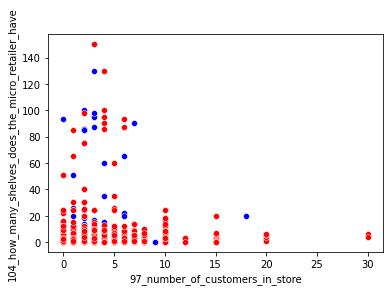

In [103]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='97_number_of_customers_in_store', y='104_how_many_shelves_does_the_micro_retailer_have', color="blue", data=MRetailer)
sns.scatterplot(x='145_number_direct_competitors', y='104_how_many_shelves_does_the_micro_retailer_have', color="red", data=MRetailer)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [104]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.02384582956530823

In [105]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1544209492436445